# Data Cleaning for Chess Dataset
In this notebook, we will do the data cleaning and preparation on the chess dataset taken from:

https://www.kaggle.com/datasets/datasnaek/chess

## Install Lichess API

In [1]:
!pip install python-lichess -q


## Import required libraries

In [2]:
import plotly.io as pio
pio.renderers.default='notebook'

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import plotly.express as px
import plotly.graph_objects as go
import random

import lichess.api

## Import dataset

In [3]:
chess_df=pd.read_csv("games.csv")
chess_df.head(30)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


## Removing duplicates

When trying to find outliers for "turns", we noticed a duplicate row when turns is 349. Lets confirm it and remove any duplicate rows.

In [4]:
chess_df[chess_df["turns"]==349].head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
11554,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13
13859,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13


In [5]:
chess_df.duplicated().value_counts()

False    19629
True       429
dtype: int64

In [6]:
chess_df=chess_df.drop_duplicates()
chess_df[chess_df["turns"]==349].head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
11554,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13


## Dealing with missing values

There seems to be no missing or invalid values found in this dataset.

In [7]:
chess_df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [8]:
chess_df.dropna(inplace=True)

## Actual duration of game

We found that around 43% of the games have a game duration of 0 which is not possible. The two column seems to be meaningless so we decide to drop it.

In [9]:
dur = chess_df[chess_df['last_move_at']-chess_df['created_at'] == 0].shape[0]
print("Number of games with no duration: {}".format(dur))

Number of games with no duration: 8533


In [10]:
chess_df.drop(columns = ["last_move_at", "created_at"], inplace = True)

## Time controls
Next, we try to categorize the games into different time controls following the logic from lichess.com

We want to try and categorize the type of matches:

The increment code is in the format minutes+seconds.

Different type of chess matches can be determined by the the duration of a game.\
For Lichess, categories are based on the game duration which uses this formula.\
Game duration = (clock initial time) + 40x(clock increment)\
For example, Increment_code=5+5, Game duration = 5x60 + 40x5 = 500\
**UltraBullet** - less than 30s  (<29s) \
**Bullet** - less than 3 minutes (<179s)\
**Blitz** - less than 8 minutes (<479s)\
**Rapid** - less than 25 minutes (<1499s)\
**Classical** - more than or equal to 25 minutes (≥1500s)

Reference:
https://lichess.org/faq#time-controls

In [11]:
# function to convert time_control to total estimated duration in seconds
def convert_time(time_str):
    minutes, seconds = time_str.split("+")
    total_seconds = 60*(int(minutes)) + 40*(int(seconds))
    return total_seconds



chess_df["EstDur"]=chess_df["increment_code"].apply(convert_time)
#add new column for estimated duration


In [12]:
chess_df["EstDur"].describe()

count    19629.000000
mean      1035.823526
std       1390.673651
min        460.000000
25%        600.000000
50%        620.000000
75%       1020.000000
max      18000.000000
Name: EstDur, dtype: float64

In [13]:
def categorize_time(time_val):
    if time_val < 29:
        return "UltraBullet"
    elif time_val < 179:
        return "Bullet"
    elif time_val < 479:
        return "Blitz"
    elif time_val < 1499:
        return "Rapid"
    else:
        return "Classical"
    
chess_df["Event"]=chess_df["EstDur"].apply(categorize_time)
#add new column for the speed of game


In [14]:
chess_df["Event"].value_counts()

Rapid        16705
Classical     2920
Blitz            4
Name: Event, dtype: int64

The average estimated game duration is 1039 seconds (~17 minutes). Only 4 blitz games.

## Search for outliers

We try to see if there are any outliers we have to remove.


In [15]:
rating1=pd.DataFrame(chess_df["white_rating"])
rating2=pd.DataFrame(chess_df["black_rating"])
rating_df=pd.concat([chess_df["white_rating"],chess_df["black_rating"]])
rating_df=pd.DataFrame(rating_df)

<AxesSubplot:>

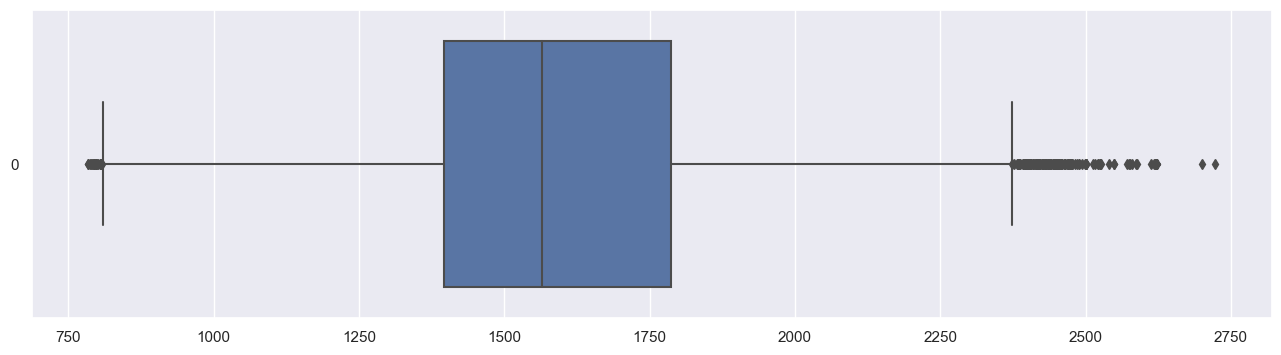

In [16]:
f = plt.figure(figsize=(16, 4))
sb.boxplot(data=rating_df,orient="h")

In [17]:
rating_df.describe()

,0
count,39258.000000
mean,1592.207423
std,290.187025
min,784.000000
25%,1396.000000
50%,1564.000000
75%,1787.000000
max,2723.000000


<AxesSubplot:>

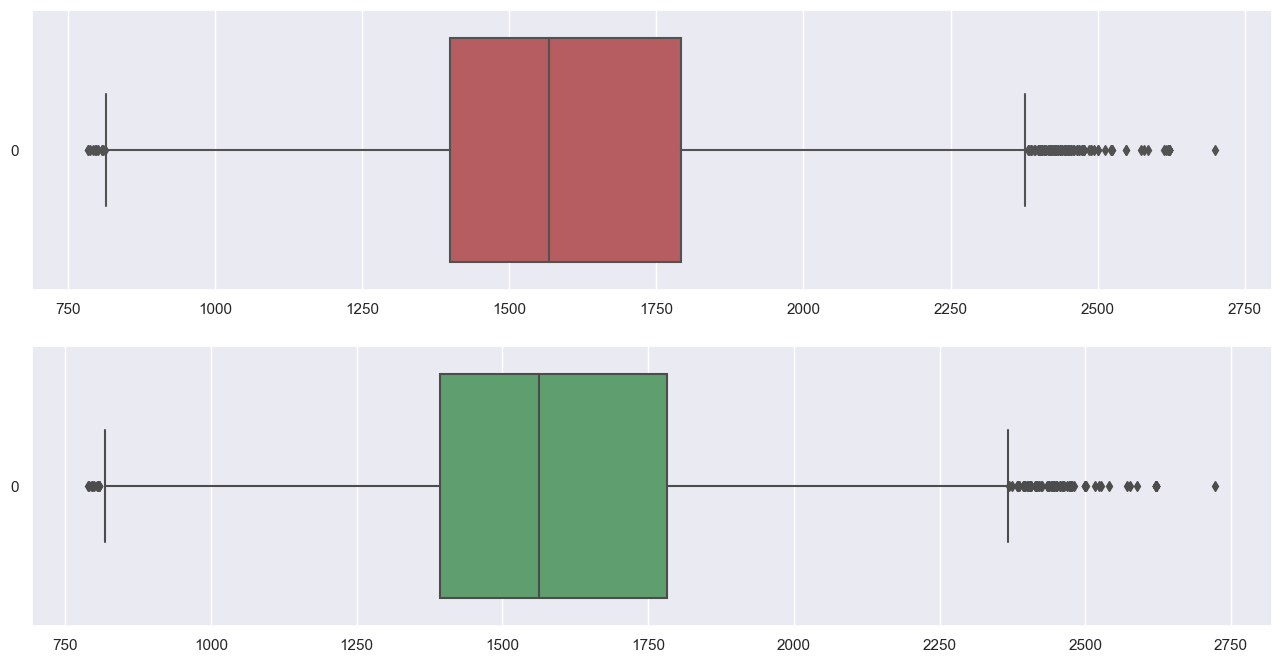

In [18]:
f,axes=plt.subplots(2,1,figsize=(16, 8))
sb.boxplot(data=chess_df["white_rating"],orient="h",ax=axes[0],color='r')
sb.boxplot(data=chess_df["black_rating"],orient="h",ax=axes[1],color='g')


The distribution and spread for white rating and black rating are similar.\
We add a new column ratingDiff which shows the difference in rating between two players.\
ratingDiff>0 means white have a higher rating while ratingDiff<0 means black has a higher rating.

We do not want to elimate the outliers as there can exist elite players and trash players. If necessary for analysis, we can remove them later.

In [19]:
chess_df["RatingDiff"]=chess_df["white_rating"]-chess_df["black_rating"]

<AxesSubplot:xlabel='RatingDiff', ylabel='Count'>

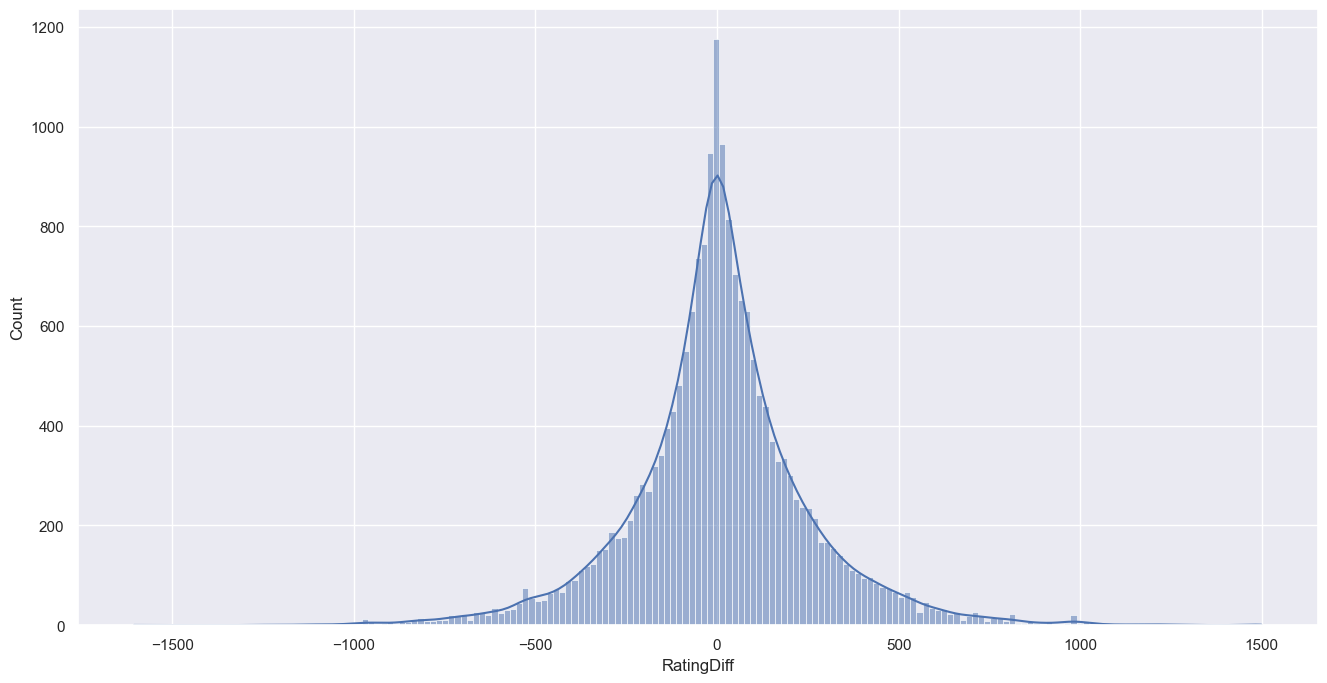

In [20]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data=chess_df["RatingDiff"],kde=True)

We notice a a normal distribution of the rating difference which shows Lichess' incredible matchmaking process.

In [21]:
chess_df["turns"].describe()

count    19629.000000
mean        60.458607
std         33.502852
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

<AxesSubplot:>

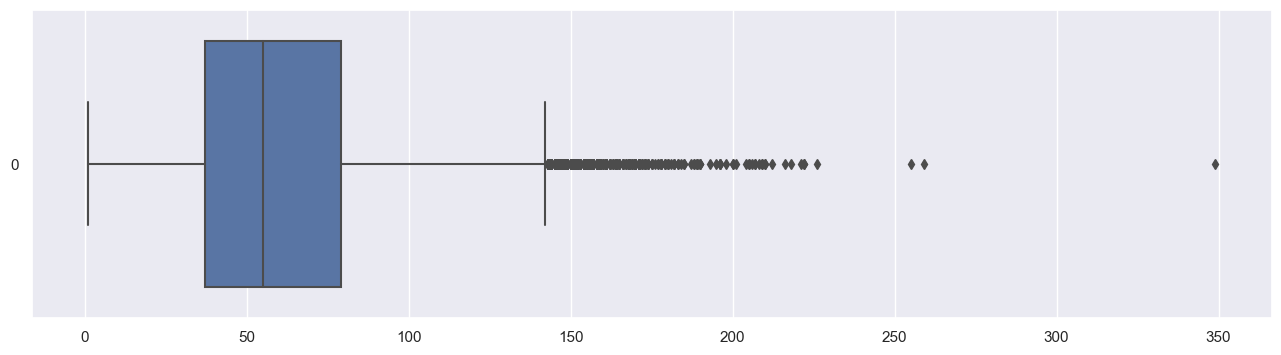

In [22]:
f = plt.figure(figsize=(16, 4))
sb.boxplot(data=chess_df["turns"],orient="h")

In [23]:
outlier=chess_df[chess_df["turns"]>142]
outlier.head(30)

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,EstDur,Event,RatingDiff
148,JbLparSt,True,156,mate,black,15+15,sassou,1226,vladimir_shindin,1478,e4 e5 Nf3 Bb4 Nxe5 Qe7 Nd3 Qxe4+ Be2 Qxg2 Bf3 ...,C40,King's Knight Opening,3,1500,Classical,-252
176,fPPfEuu5,False,144,outoftime,draw,10+0,isachess,1866,teguhmaster,1843,e4 c5 Nf3 d6 g3 Nf6 d3 Nc6 Bg2 g6 O-O Bg7 Nc3 ...,B50,Sicilian Defense,4,600,Rapid,23
180,46AuHfcq,True,158,mate,black,6+6,humb,1835,isachess,1865,d4 Nf6 Nf3 e6 c4 c5 e3 cxd4 exd4 d5 c5 Be7 Bb5...,E10,Blumenfeld Countergambit #2,6,600,Rapid,-30
190,OmwDxZpJ,True,178,mate,black,16+0,sergeylobanov,1843,isachess,1836,e4 c5 c3 Nc6 d4 cxd4 cxd4 d6 Bb5 a6 Bxc6+ bxc6...,B22,Sicilian Defense: Alapin Variation,3,960,Rapid,7
213,mJ9VpdxV,True,159,mate,white,15+1,taranga,1280,moon50,1485,e4 e5 Nf3 Nc6 Bc4 h6 Nc3 Nf6 d3 d6 Be3 Be7 O-O...,C55,Italian Game: Anti-Fried Liver Defense,6,940,Rapid,-205
220,lE65efFF,True,150,draw,draw,15+1,taranga,1259,moon50,1663,e4 e5 Nf3 Nc6 Bc4 h6 Nc3 Nf6 d3 Bc5 Qe2 d6 Be3...,C55,Italian Game: Anti-Fried Liver Defense,6,940,Rapid,-404
265,AUzK1bj8,True,177,outoftime,white,10+3,au118,1535,eideral,1609,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Na5 Bb5+ c6 ...,C58,Italian Game: Two Knights Defense | Polerio D...,11,720,Rapid,-74
370,mwcADhNn,True,163,outoftime,draw,10+0,rustam9,972,granham,1247,c4 e5 b4 d5 Qb3 dxc4 Qxc4 Qd6 e4 Qxb4 Qxb4 Bxb...,A20,English Opening: King's English Variation,2,600,Rapid,-275
433,FhfFRSoX,True,148,outoftime,draw,10+0,kyanh,1529,fivetimes,1763,d4 d5 Bf4 g6 e3 Bg7 Nf3 Be6 c3 Nd7 Qb3 Rb8 Ng5...,D00,Queen's Pawn Game: Mason Attack,3,600,Rapid,-234
440,BThm18qK,True,195,draw,draw,10+0,kyanh,1496,tossinov,1703,d4 Nf6 Bf4 g6 Nf3 Bg7 e3 d6 c3 O-O Nbd2 Nc6 Bd...,A48,London System,5,600,Rapid,-207


The outliers for number of turns seem to be more than 142 moves. This outliers seems like matches that simply went on for too long. Might be useful for analysis later on.

## Removing bogus matches
Next we want to see if there are any illegtimate matches. One obvious way is to weed out short matches.

Scholars mate, referred to as four-move checkmate. Lets see if there is any.

In [24]:
scholar_mate=chess_df[(chess_df["turns"]==4) & (chess_df["victory_status"]=="mate")]
scholar_mate.describe()

,turns,white_rating,black_rating,opening_ply,EstDur,RatingDiff
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4.0,1547.083333,1729.333333,1.083333,2040.000000,-182.250000
std,0.0,77.617311,268.514206,0.288675,5026.323435,296.462208
min,4.0,1500.000000,1238.000000,1.000000,500.000000,-364.000000
25%,4.0,1520.250000,1720.000000,1.000000,600.000000,-355.000000
50%,4.0,1527.000000,1871.500000,1.000000,600.000000,-334.500000
75%,4.0,1537.750000,1887.000000,1.000000,600.000000,-181.250000
max,4.0,1787.000000,1897.000000,2.000000,18000.000000,394.000000


Lets see if there are any mates with lesser turns.

Fools mate, refered to as two-move checkmate. Lets see if there is any if there are legitimate.

In [25]:
fool_mate=chess_df[(chess_df["turns"]<=3) & (chess_df["victory_status"]=="mate")]
fool_mate.describe()

,turns,white_rating,black_rating,opening_ply,EstDur,RatingDiff
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print("white id:\n")
print(scholar_mate["white_id"].value_counts())

print("\nblack id:\n")
print(scholar_mate["black_id"].value_counts())


white id:

duckduckfrog    8
king-_-micah    2
kreedome        1
nigelnaomi      1
Name: white_id, dtype: int64

black id:

smartduckduckcow    6
ducksandcats        2
razzzzy             2
flawed              1
the-hacker          1
Name: black_id, dtype: int64


The player id **smartduckduckcow** and **duckduckfrog** looks suspicious. Lets investigate further.



In [27]:
#check the opponent id for smartduckduckcow
print(chess_df[(chess_df["black_id"]=="smartduckduckcow")]["white_id"].value_counts())
print("\n")
print(chess_df[(chess_df["white_id"]=="smartduckduckcow")]["black_id"].value_counts())

duckduckfrog    10
abolfazl1386     2
sunwatair57      2
Name: white_id, dtype: int64


duckduckfrog    2
Name: black_id, dtype: int64


There is a very frequent pairing between **duckduckfrog** and **smartduckduckcow**.

In [28]:
print(chess_df[(chess_df["black_id"]=="duckduckfrog")]["white_id"].value_counts())
print("\n")
print(chess_df[(chess_df["white_id"]=="duckduckfrog")]["black_id"].value_counts())

smartduckduckcow    2
Name: white_id, dtype: int64


smartduckduckcow    10
ducksandcats         2
Name: black_id, dtype: int64


**duckduckfrog** only matched with **smartduckduckcow** and another animal centric id. lets continue investigating this new id.

In [29]:
#check the opponent id for ducksandcats
print(chess_df[(chess_df["black_id"]=="ducksandcats")]["white_id"].value_counts())
print("\n")
print(chess_df[(chess_df["white_id"]=="ducksandcats")]["black_id"].value_counts())

duckduckcow        4
wall-of-shields    3
jak4               2
trenujeme_sach     2
bobbytal           2
axela              2
johnsmith97        2
mario455           2
duckduckfrog       2
chess_pro_107      2
slon11             2
invitado79         2
jesusarmy8         2
hammerheart        2
konst767           2
mileadam           2
elnazjavaheri      2
zdb                2
booknote1937       1
zlijohnny          1
Name: white_id, dtype: int64


duckduckcow        4
wall-of-shields    4
maxzep64           2
vezir9             2
muligan07          2
reda2345           2
2700172            2
michal220          2
chess_pro_107      2
partoazhdary11     2
jtg2016            2
bobbytal           2
Name: black_id, dtype: int64


We noticed another similar farm animal centric id, **duckduckcow**.

In [30]:
print(chess_df[(chess_df["black_id"]=="duckduckcow")]["white_id"].value_counts())
print("\n")
print(chess_df[(chess_df["white_id"]=="duckduckcow")]["black_id"].value_counts())

ducksandcats    4
Name: white_id, dtype: int64


ducksandcats    4
Name: black_id, dtype: int64


The chain of animals centric names ends with **ducksandcats**. We use the lichess API to confirm if any of these players were banned.

In [31]:
animals=["duckduckcow","ducksandcats","smartduckduckcow","duckduckfrog"]

for animal in animals:
    user= lichess.api.user(animal)
    if "tosViolation" in user:
        print(animal+" is banned")
    elif "disabled" in user:
        print(animal+" is disabled")
    else:
        print(animal+" is still up")

duckduckcow is still up
ducksandcats is still up
smartduckduckcow is banned
duckduckfrog is disabled


For now, we can only show that the player **smartduckduckcow** was boosting with a possible alternate account **duckduckfrog**.\
So we will remove the rows containing these two pairings. 12 of these games were removed.

In [32]:
chess_df=chess_df.drop(chess_df[(chess_df["black_id"]=="smartduckduckcow")&(chess_df["white_id"]=="duckduckfrog")].index)
chess_df=chess_df.drop(chess_df[(chess_df["white_id"]=="smartduckduckcow")&(chess_df["black_id"]=="duckduckfrog")].index)                                

## Unnecessary columns
So far, the columns, id, white_id, and black_id are not meaningful. So we will drop them.

In [33]:
chess_df=chess_df.drop(columns=["id","white_id","black_id"])
chess_df.head(30)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,EstDur,Event,RatingDiff
0,False,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,980,Rapid,309
1,True,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,700,Rapid,61
2,True,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,700,Rapid,-4
3,True,61,mate,white,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1200,Rapid,-15
4,True,95,mate,white,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1920,Classical,54
5,False,5,draw,draw,10+0,1250,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4,600,Rapid,248
6,True,33,resign,white,10+0,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,600,Rapid,97
7,False,9,resign,black,15+30,1413,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5,2100,Classical,-695
8,True,66,resign,black,15+0,1439,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6,900,Rapid,47
9,True,119,mate,white,10+0,1381,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4,600,Rapid,172


In [34]:
chess_df.reset_index()
chess_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19617 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rated           19617 non-null  bool  
 1   turns           19617 non-null  int64 
 2   victory_status  19617 non-null  object
 3   winner          19617 non-null  object
 4   increment_code  19617 non-null  object
 5   white_rating    19617 non-null  int64 
 6   black_rating    19617 non-null  int64 
 7   moves           19617 non-null  object
 8   opening_eco     19617 non-null  object
 9   opening_name    19617 non-null  object
 10  opening_ply     19617 non-null  int64 
 11  EstDur          19617 non-null  int64 
 12  Event           19617 non-null  object
 13  RatingDiff      19617 non-null  int64 
dtypes: bool(1), int64(6), object(7)
memory usage: 2.1+ MB


Since 20000 is too large of a sample size,we will be randomly selecting 10000 data points instead 

In [35]:
sample_size= len(chess_df)//2

In [36]:
random_sample= chess_df.sample(n=sample_size, random_state=42)
chess_df.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,EstDur,Event,RatingDiff
0,False,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,980,Rapid,309
1,True,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,700,Rapid,61
2,True,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,700,Rapid,-4
3,True,61,mate,white,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1200,Rapid,-15
4,True,95,mate,white,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1920,Classical,54


In [37]:
number_rows=random_sample.shape[0]
print("Number of rows in the DataFrame:", number_rows)

Number of rows in the DataFrame: 9808


## What we did:
1. Found and removed duplicate rows
2. Checked for any missing or invalid rows and columns
3. Added 3 new columns "EstDur", "Event", and "RatingDiff"
4. Removed rows/games that were determined to be fake.
5. Removed 3 unnecessary columns, "id", "white_id", and "black_id"
6. Removed half the number of rows in the dataset.

We will export this cleaned dataset and further process it in the Exploratory Data Analysis part, adding and removing columns/variable depending on the model we decide to use in the Machine Learning part.

In [38]:
random_sample.to_csv("cleaned_games.csv")